<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Python%20SKLearn/Training%20Models/Iris%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [32]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
#iris['data'] is a 150x4 array. 
X = iris['data'][:,3:] # get the last column: petal width
y = (iris['target'] == 2).astype(np.int) #label is iris-virginica or not

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Fit a Logisitc Regression solver to the petal-iris_virginica data

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

Plot the probability of the flower being Iris Virginica based on it's petal length

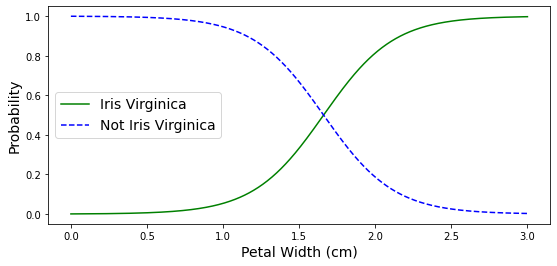

In [40]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(9,4))
plt.plot(X_new, y_proba[:,1], 'g-', label="Iris Virginica")
plt.plot(X_new, y_proba[:,0], 'b--', label="Not Iris Virginica")
plt.xlabel("Petal Width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.show()

In [7]:
y_proba.shape

(1000, 2)

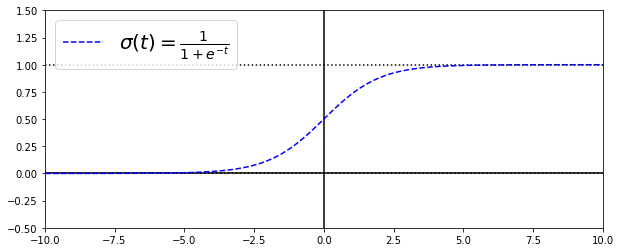

NameError: ignored

In [31]:
plt.figure(figsize=(10,4))
#plot axis
plt.plot([-10,10],[0,0], 'k-') #x-axis
plt.plot([0,0],[-10,10],'k-') #y-axis
#plot asymptotes
plt.plot([-10,10], [1,1], 'k:')
plt.plot([-10,10], [0,0], 'k:')
#restrict viewing window
plt.axis([-10, 10, -0.5, 1.5])
#draw logisitic function
t = np.linspace(-10,10,100)
sig = 1 / (1 + np.exp(-t))
plt.plot(t, sig, 'b--', label=r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
plt.legend(loc='upper left', fontsize=20)
plt.show()
save_fig("logistic_function_plot")